# Author : B Prasanth

Data Science & Business Analytics Intern

Task 3 : Exploratory Data Analysis - Retail 

GRIP - The Sparks Foundation

In this task, I try to perform exploratory data analysis on the dataset 'SampleSuperstore' and try to find out the weak areas where I, as a business manager, can work to make more profits.

Technical Stack - Numpy, Pandas, Seaborn, Matplotlib

In [1]:
# Import Libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
from pylab import rcParams

In [2]:
store=pd.read_csv('SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
store.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
store.shape

(9994, 13)

In [5]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
# Checking the unique values.

store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Cleaning the data

In [7]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# Dropping the columns.

sample=store.drop(['Region'],axis=1)

In [9]:
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
sample.duplicated().sum()

17

In [11]:
sample.drop_duplicates(keep="first",inplace=True)
sample.shape

(9977, 12)

In [12]:
# Defining statistical values.

sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# Relationship Analysis

In [13]:
correlation=sample.corr()

# Heatmap 

It provides the correlation between every feature of the dataset. Correlation ranges from -1 to +1.

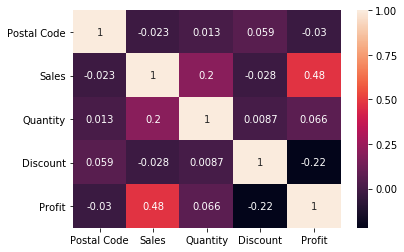

In [14]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True);

# Pairplot

Pairplot allows us to see both distribution of single variables and relationships between two variables.

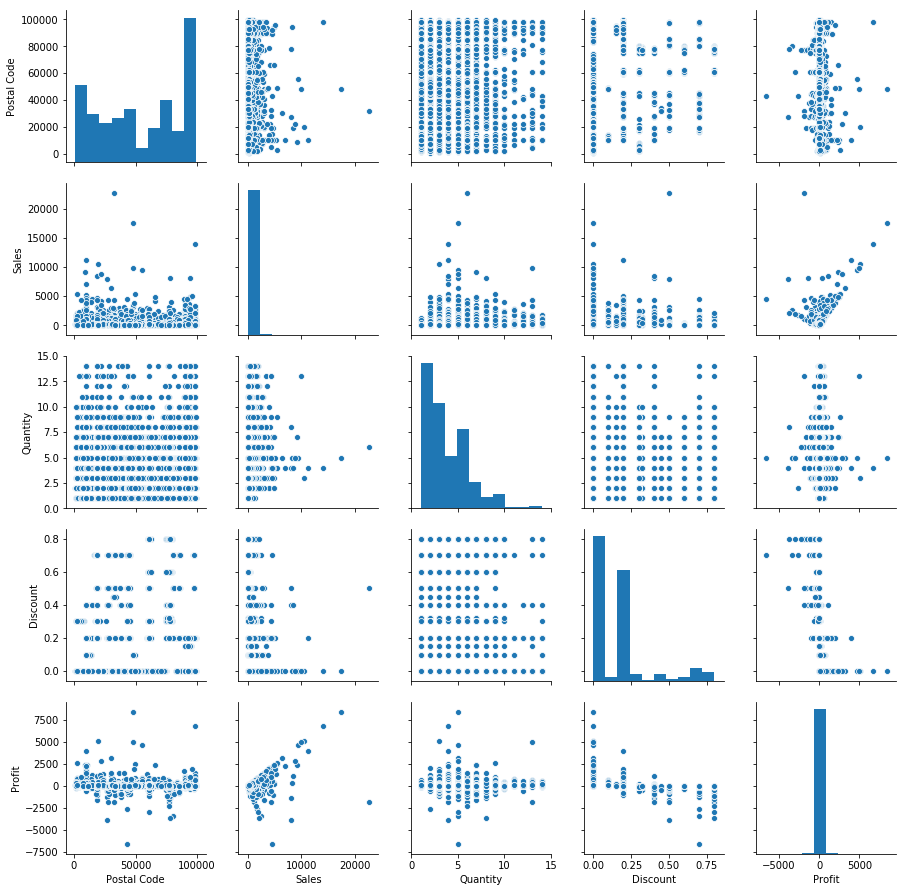

In [15]:
sns.pairplot(sample);

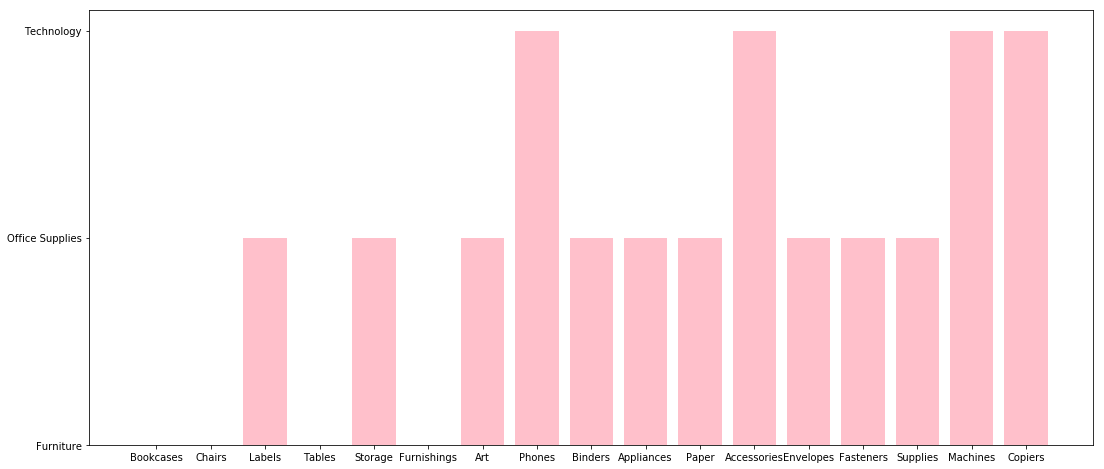

In [16]:
plt.figure(figsize=(18,8))
plt.bar('Sub-Category','Category',data=sample,color='pink');

From this graph we can easily makeout which subcategory to choose when we are looking to purchase a product.

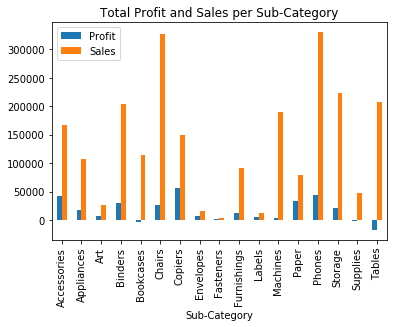

In [17]:
sample.groupby('Sub-Category')['Profit','Sales'].agg(sum).plot.bar()
plt.title('Total Profit and Sales per Sub-Category');

From the above barplot, we can observe that there is more profit in copiers and selling price is high for chairs and phones.

In [18]:
sample['Cost']=sample['Sales']-sample['Profit']
sample['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [19]:
sample['Profit %']=(sample['Profit']/sample['Cost'])*100

In [22]:
sample.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
8422,Standard Class,Consumer,United States,Lakewood,New Jersey,8701,Office Supplies,Fasteners,17.900,5,0.0,8.7710,9.1290,96.078431
9336,Standard Class,Corporate,United States,San Francisco,California,94110,Office Supplies,Fasteners,17.900,5,0.0,8.7710,9.1290,96.078431
888,Standard Class,Corporate,United States,San Francisco,California,94122,Office Supplies,Paper,34.680,6,0.0,16.9932,17.6868,96.078431
1117,Standard Class,Consumer,United States,Roswell,Georgia,30076,Office Supplies,Paper,279.900,5,0.0,137.1510,142.7490,96.078431
1990,Standard Class,Consumer,United States,Springfield,Missouri,65807,Office Supplies,Paper,17.340,3,0.0,8.4966,8.8434,96.078431


From the above table, we can see that by selling phones and papers retailers we get a 100 percent profit.

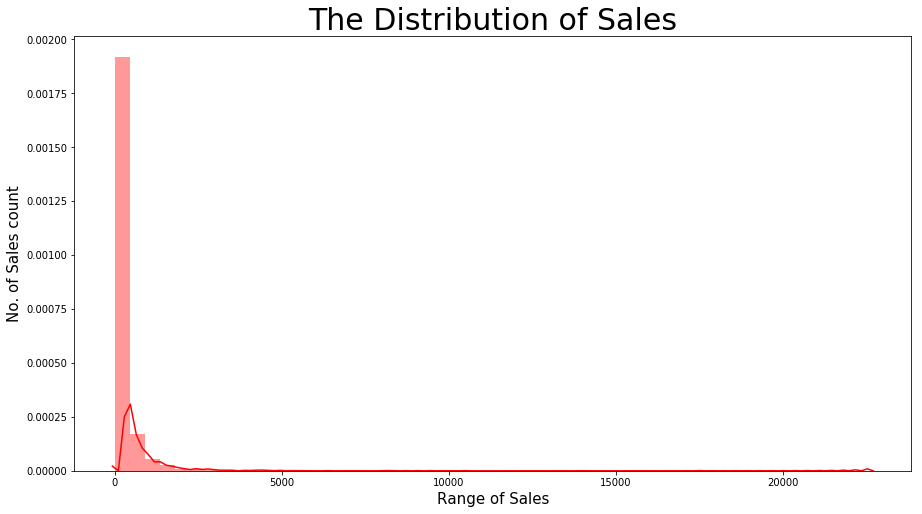

In [23]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(sample['Sales'], color = 'red')
plt.title('The Distribution of Sales', fontsize = 30)
plt.xlabel('Range of Sales', fontsize = 15)
plt.ylabel('No. of Sales count', fontsize = 15)
plt.show()

# Thank you.